<a href="https://colab.research.google.com/github/kovac04/nets/blob/main/0_to_stable_diffusion/mnist_from_scratch_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd

3


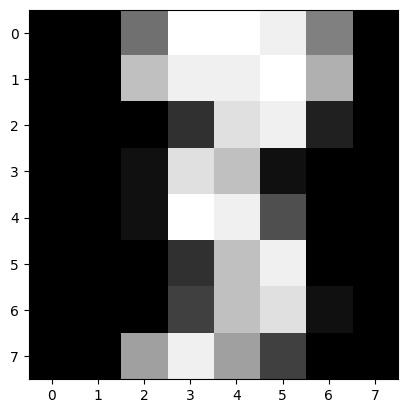

In [52]:
mnist = load_digits()
X,y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
plt.imshow(X_train[11].reshape(8,8),cmap='gray')
print(y_train[11])

In [20]:
class fishNet():
  def __init__(self):
    self.l1 = nn.Linear(64,128)
    self.act = nn.ReLU()
    self.l2 = nn.Linear(128,10)

  def forward(self,x):
    x = self.l1(x)
    x = self.act(x)
    x = self.l2(x)
    return x


In [42]:
model = fishNet()
model.forward(torch.tensor(X_train[:10]).float())

tensor([[ 1.8762,  1.9432, -1.7819, -1.6811, -3.4477, -1.0798, -1.4360,  0.5731,
         -0.0265,  1.7361],
        [ 3.1642,  1.7701, -0.9038, -1.8337, -2.5115, -1.6935, -3.7233, -0.2674,
         -0.7044,  0.6301],
        [ 2.5764,  1.2561, -0.4513, -2.7379, -2.9032, -0.9694, -3.8175,  1.0576,
          0.2867,  1.2696],
        [ 1.3078,  1.3953, -1.7242, -0.9774, -2.1775, -0.8229, -3.8171,  1.1114,
         -0.1478,  0.6427],
        [ 2.8336,  0.5668, -1.2166, -2.8337, -2.3945, -0.4779, -2.7306, -0.5707,
         -0.7518,  0.4685],
        [ 2.0841,  2.0513, -0.3123, -0.8504, -1.0166, -1.5222, -2.4003,  0.8235,
          0.8615,  0.6550],
        [ 2.2106,  0.5866, -2.2983, -2.0526, -3.4314, -0.9677, -2.8323,  0.8581,
          0.9095,  2.1771],
        [ 1.3976,  1.4626, -2.5734, -2.2598, -3.4248, -0.7220, -2.4490,  1.2928,
         -0.1371,  1.7901],
        [ 3.0396,  1.0357, -2.2674, -1.2434, -1.1850, -1.2049, -3.3550, -0.0378,
          0.2687, -0.3980],
        [ 1.3349,  

In [69]:
# take 32 example from X_train
BS = 32
for i in range(1):
  sample = np.random.randint(0,X_train.shape[0],size=BS)  # 32 random ints (0-64 / number of training examples)
  X_batch = X_train[sample]                               # select random training examples
  y_batch = y_train[sample]                               # select those same labels
  out = model.forward(torch.tensor(X_batch).float())      # give 10 probabilities for each of 32 examples
print(y_batch[0], out[0])     # correct label and [wrong] probabilities for that example

4 tensor([ 3.5269,  0.9945, -1.2426, -1.5177, -0.9193, -1.2457, -2.3060,  2.8708,
         1.5846,  0.2412], grad_fn=<SelectBackward0>)
